# Fully-Connected Neural Network

### Hyperparameters

In [19]:
ITERATIONS = 20000
HIDDENS = [3]
NUM_CLASSES = 2
LEARNING_RATE = .1
REGULARIZER = 0
GRADIENT_CHECKING = False
BATCH_SIZE, RANDOM_MINIBATCH = 1, True

### Load Data

In [20]:
from data.softmax import X_train, Y_train

X_train, Y_train

(array([[1, 2, 2, 1],
        [1, 2, 1, 2]]), array([0, 0, 1, 1]))

### Train

In [21]:
from nn.deep.model import NeuralNetwork
from nn.deep.helper import Model

nn = NeuralNetwork(X_train, Y_train,
                   Hs=HIDDENS, C=NUM_CLASSES,
                   learning_rate=LEARNING_RATE, regularizer=REGULARIZER,
                   batch_size=BATCH_SIZE, random_minibatch=RANDOM_MINIBATCH,
                   gradient_checking=GRADIENT_CHECKING)

def states(iters):
    for _ in range(iters):
        nn.learn()
        yield nn.info
        
states = list(states(ITERATIONS))

df = pd.DataFrame(states, columns=Model._fields)

### Loss

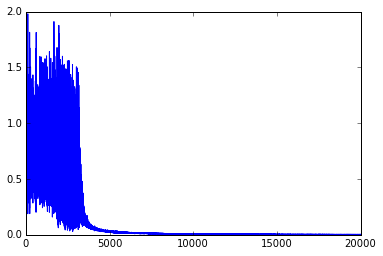

In [22]:
df.loss.plot()

### `xor`

/home/ebanner/.anaconda/envs/py35/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


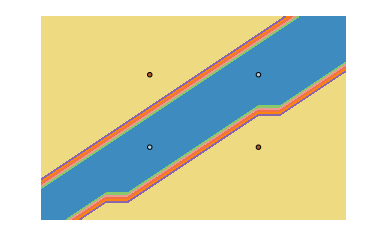

In [23]:
from ipywidgets import interact, fixed

@interact(X_train=fixed(X_train), ys_train=fixed(Y_train), view_index=(0, len(states)-1), states=fixed(states))
def plot(X_train, ys_train, view_index, states):
    s = states[view_index]
    nn = NeuralNetwork(X_train, Y_train, Hs=HIDDENS, C=NUM_CLASSES, params=s.params)
    
    xmin = ymin = 0
    xmax = ymax = 3
    step = .2
    xx, yy = np.meshgrid(np.arange(xmin, xmax, step), np.arange(ymin, ymax, step))

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    fig, ax = plt.subplots()
    Z = nn.predict(np.c_[xx.ravel(), yy.ravel()].T)

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=plt.cm.Paired)
    ax.axis('off')

    # Plot also the training points
    ax.scatter(X_train[0, :], X_train[1, :], c=Y_train, cmap=plt.cm.Paired)